In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
# Import data
dataset = pd.read_csv('cardio_data.csv')

In [3]:
# Rename some of the columns to make them more readable
dataset = dataset.rename(columns = {'alco' : 'alcohol', 'gluc' : 'glucose', 'smoke' : 'smoking'})

# Python build-in function to label encode categorical data, which I commented off because I prefer the alternative
#le = LabelEncoder()
#dataset['country'] = le.fit_transform(dataset['country'])

# Alternate way to label encode categorical data
dataset['country'].replace({'India': 1, 'Indonesia': 2, 'Malaysia': 3, 'Singapore': 4}, inplace = True)
dataset['occupation'].replace({'Others': 0, 'Accountant': 1, 'Architect': 2, 'Chef': 3, 'Doctor': 4, 'Engineer': 5, 'Lawyer': 6, 'Nurse': 7, 'Teacher': 8}, inplace = True)

In [4]:
# Look at data, checking for null values
#dataset.info()
# Look for more details of the numeric data, checking for any potential issues
#dataset.describe()
# Pictorial view of all the numeric data, more checking
#dataset.hist(figsize = (15, 25), layout = (5, 3))

In [5]:
# Getting rid of outliers in the variable ap_lo
column = 'ap_hi'

#plt.figure(figsize = (10, 5))
#plt.subplot(1, 2, 1)
#sns.distplot(dataset[column])
#plt.subplot(1, 2, 2)
#sns.boxplot(dataset[column])
#plt.show()

q1 = dataset[column].quantile(0.25)
q3 = dataset[column].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
dataset = dataset[dataset[column] < upper_limit]
dataset = dataset[dataset[column] > lower_limit]

#plt.figure(figsize = (10, 5))
#plt.subplot(1, 2, 1)
#sns.distplot(dataset[column])
#plt.subplot(1, 2, 2)
#sns.boxplot(dataset[column])
#plt.show()

In [6]:
# Getting rid of outliers in the variable ap_lo
column = 'ap_lo'

#plt.figure(figsize = (10, 5))
#plt.subplot(1, 2, 1)
#sns.distplot(dataset[column])
#plt.subplot(1, 2, 2)
#sns.boxplot(dataset[column])
#plt.show()

q1 = dataset[column].quantile(0.25)
q3 = dataset[column].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
dataset = dataset[dataset[column] < upper_limit]
dataset = dataset[dataset[column] > lower_limit]

#plt.figure(figsize = (10, 5))
#plt.subplot(1, 2, 1)
#sns.distplot(dataset[column])
#plt.subplot(1, 2, 2)
#sns.boxplot(dataset[column])
#plt.show()

In [7]:
# Getting rid of outliers in the variable height
column = 'height'

#plt.figure(figsize = (10, 5))
#plt.subplot(1, 2, 1)
#sns.distplot(dataset[column])
#plt.subplot(1, 2, 2)
#sns.boxplot(dataset[column])
#plt.show()

q1 = dataset[column].quantile(0.25)
q3 = dataset[column].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
dataset = dataset[dataset[column] < upper_limit]
dataset = dataset[dataset[column] > lower_limit]

#plt.figure(figsize = (10, 5))
#plt.subplot(1, 2, 1)
#sns.distplot(dataset[column])
#plt.subplot(1, 2, 2)
#sns.boxplot(dataset[column])
#plt.show()

In [8]:
# Getting rid of outliers in the variable weight, needs 3 applications as weight has low variance
column = 'weight'

#plt.figure(figsize = (10, 5))
#plt.subplot(1, 2, 1)
#sns.distplot(dataset[column])
#plt.subplot(1, 2, 2)
#sns.boxplot(dataset[column])
#plt.show()

for i in range(3):
    q1 = dataset[column].quantile(0.25)
    q3 = dataset[column].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    dataset = dataset[dataset[column] < upper_limit]
    dataset = dataset[dataset[column] > lower_limit]

#plt.figure(figsize = (10, 5))
#plt.subplot(1, 2, 1)
#sns.distplot(dataset[column])
#plt.subplot(1, 2, 2)
#sns.boxplot(dataset[column])
#plt.show()

In [9]:
# Dropping irrelevant columns
dataset = dataset.drop('date', axis = 1)
dataset = dataset.drop('id', axis = 1)

# Dropping duplicate data, as ML works better with unique data 
dataset = dataset.drop_duplicates()

In [10]:
# Calculating Body Mass Index and binning the data
dataset['bmi'] = 10000 * dataset['weight'] / (dataset['height'] * dataset['height'])
dataset['bmi'] = pd.cut(dataset['bmi'], [10, 18.5, 23, 27.5, 32.5, 50], labels = [1, 2, 3, 4, 5])

# Calculating Mean Arterial Pressure and binning the data
dataset['map'] = (2 * dataset['ap_lo'] + dataset['ap_hi']) / 3
dataset['map'] = pd.cut(dataset['map'], [70, 93.3, 99, 105.7, 119, 130], right = False, labels = [1, 2, 3, 4, 5])

# Binning the age groups
dataset['age'] = pd.cut(dataset['age'], [7305, 14610, 21915, 29220], labels = [1, 2, 3])

# Converting from categorical to numeric 
dataset[['age', 'bmi', 'map']] = dataset[['age', 'bmi', 'map']].apply(pd.to_numeric)

# Dropping columns where data has been aggregated
dataset = dataset.drop(['ap_hi', 'ap_lo', 'height', 'weight'], axis = 1)

# Dropping duplicate data, as ML works better with unique data 
dataset = dataset.drop_duplicates()

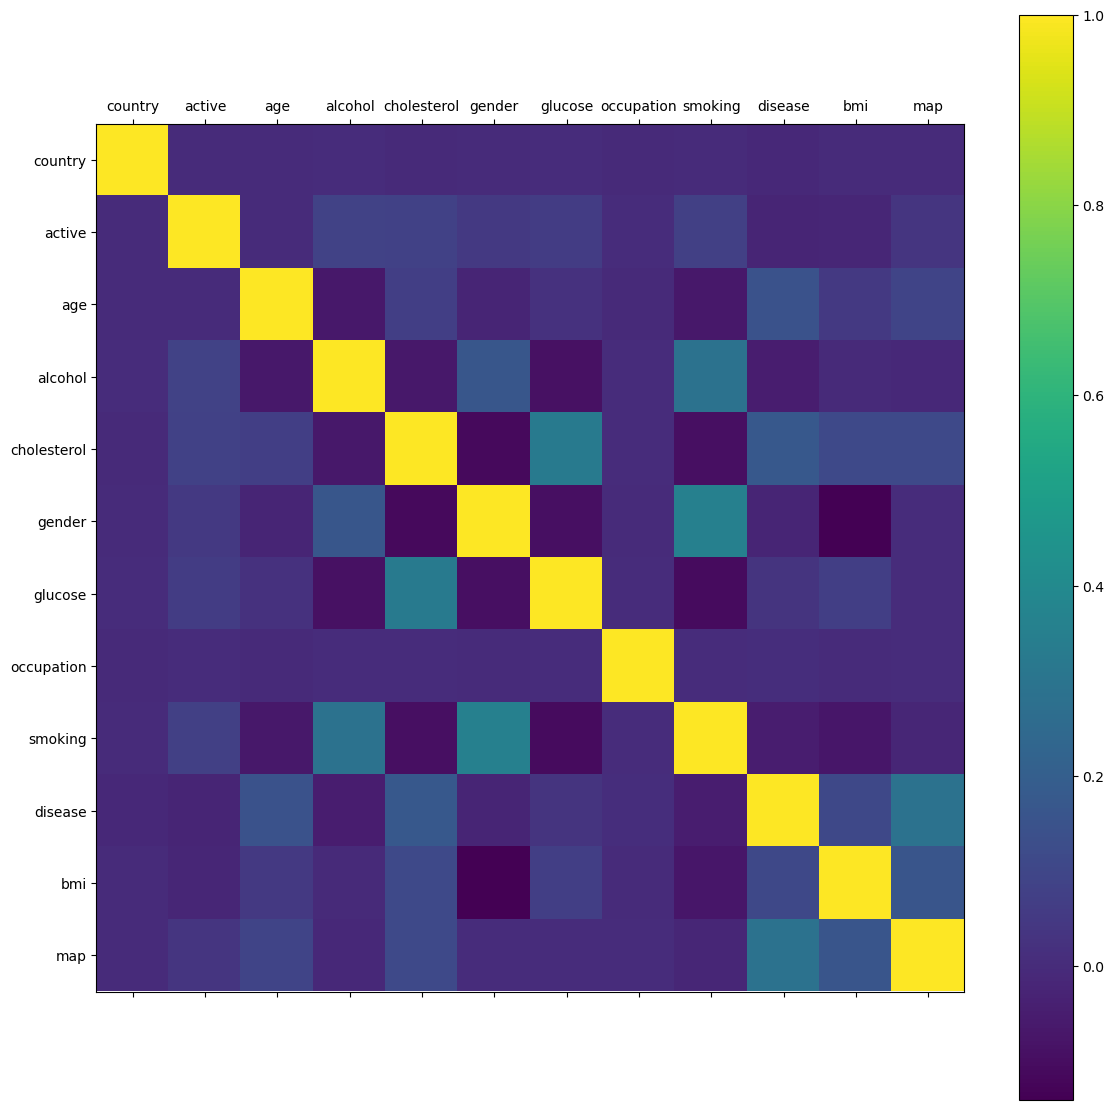

In [11]:
# Looking at the correlation between the variables to see if there is a strong correlation between them
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

In [12]:
# Splitting the data into 85% training data and 15% test data
y = dataset['disease']
X = dataset.drop(['disease'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

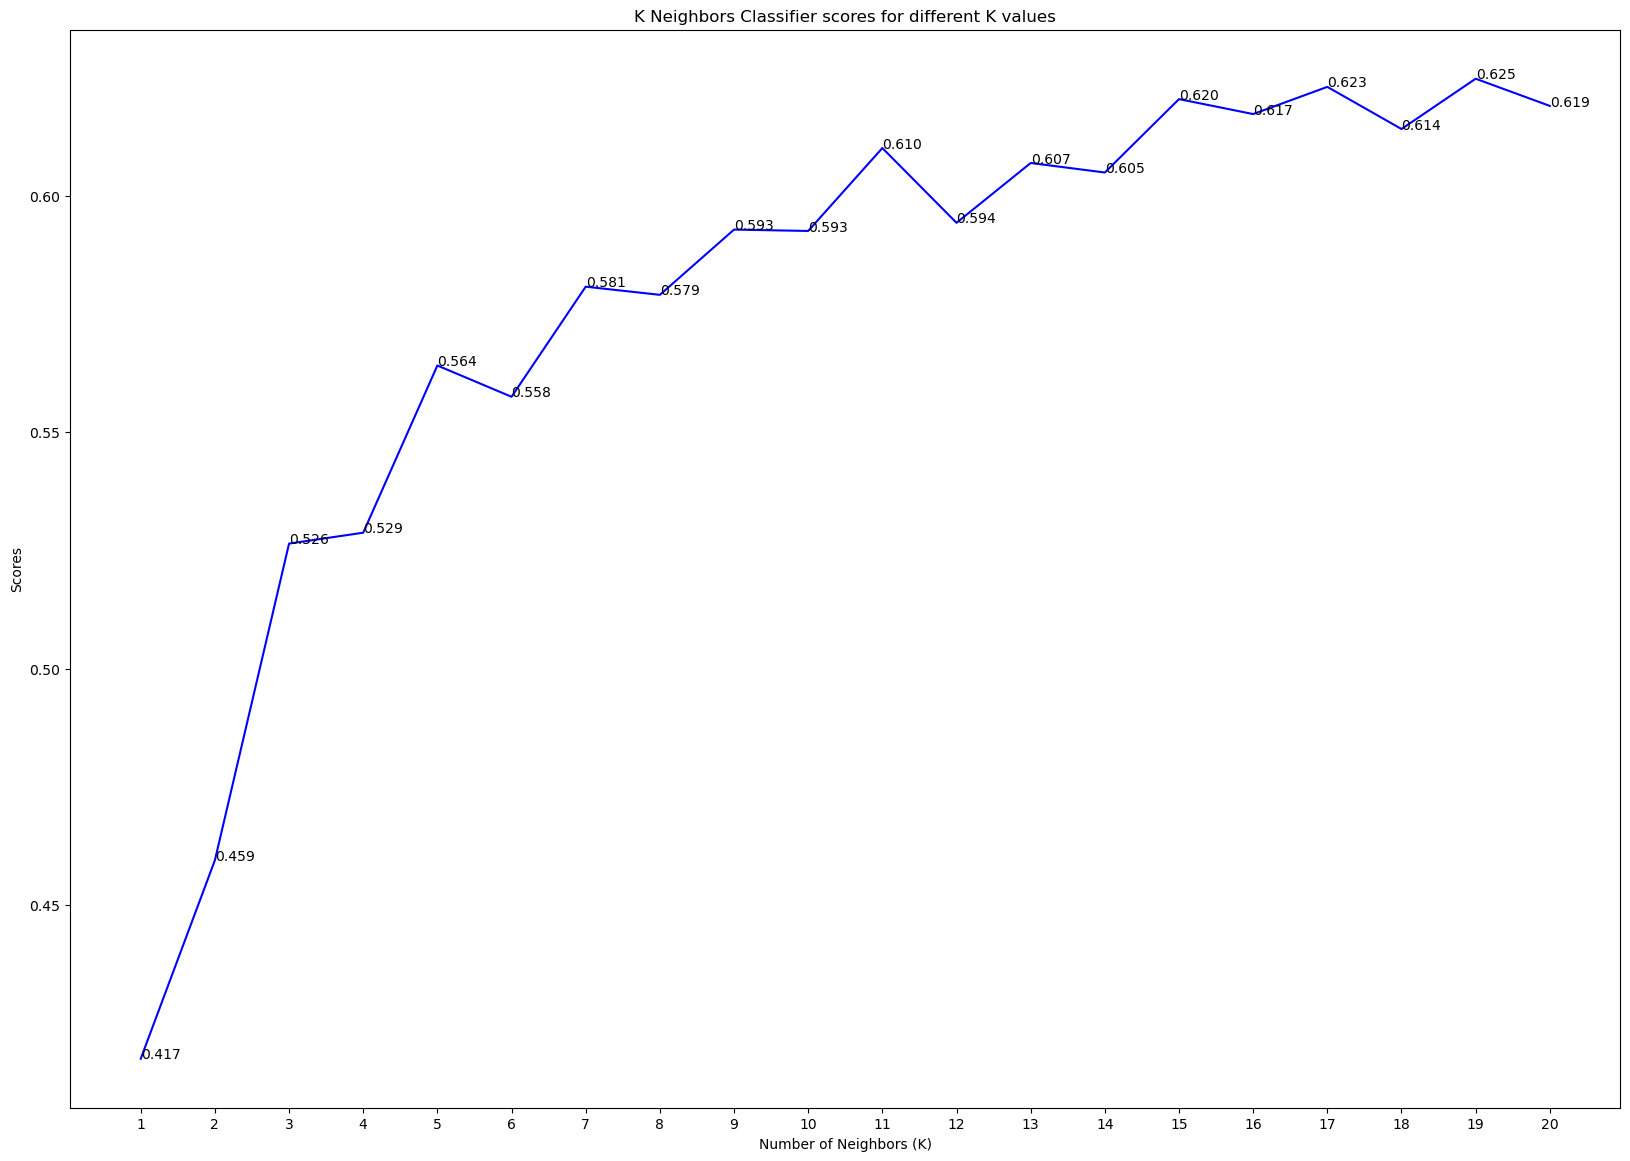

In [13]:
# K Neighbors Classifier with number of neighbors varying from 1 to 20
knn_scores = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

plt.plot([k for k in range(1, 21)], knn_scores, color = 'blue')
for i in range(1, 21):
    plt.text(i, knn_scores[i - 1], "%.3f" % knn_scores[i - 1])
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

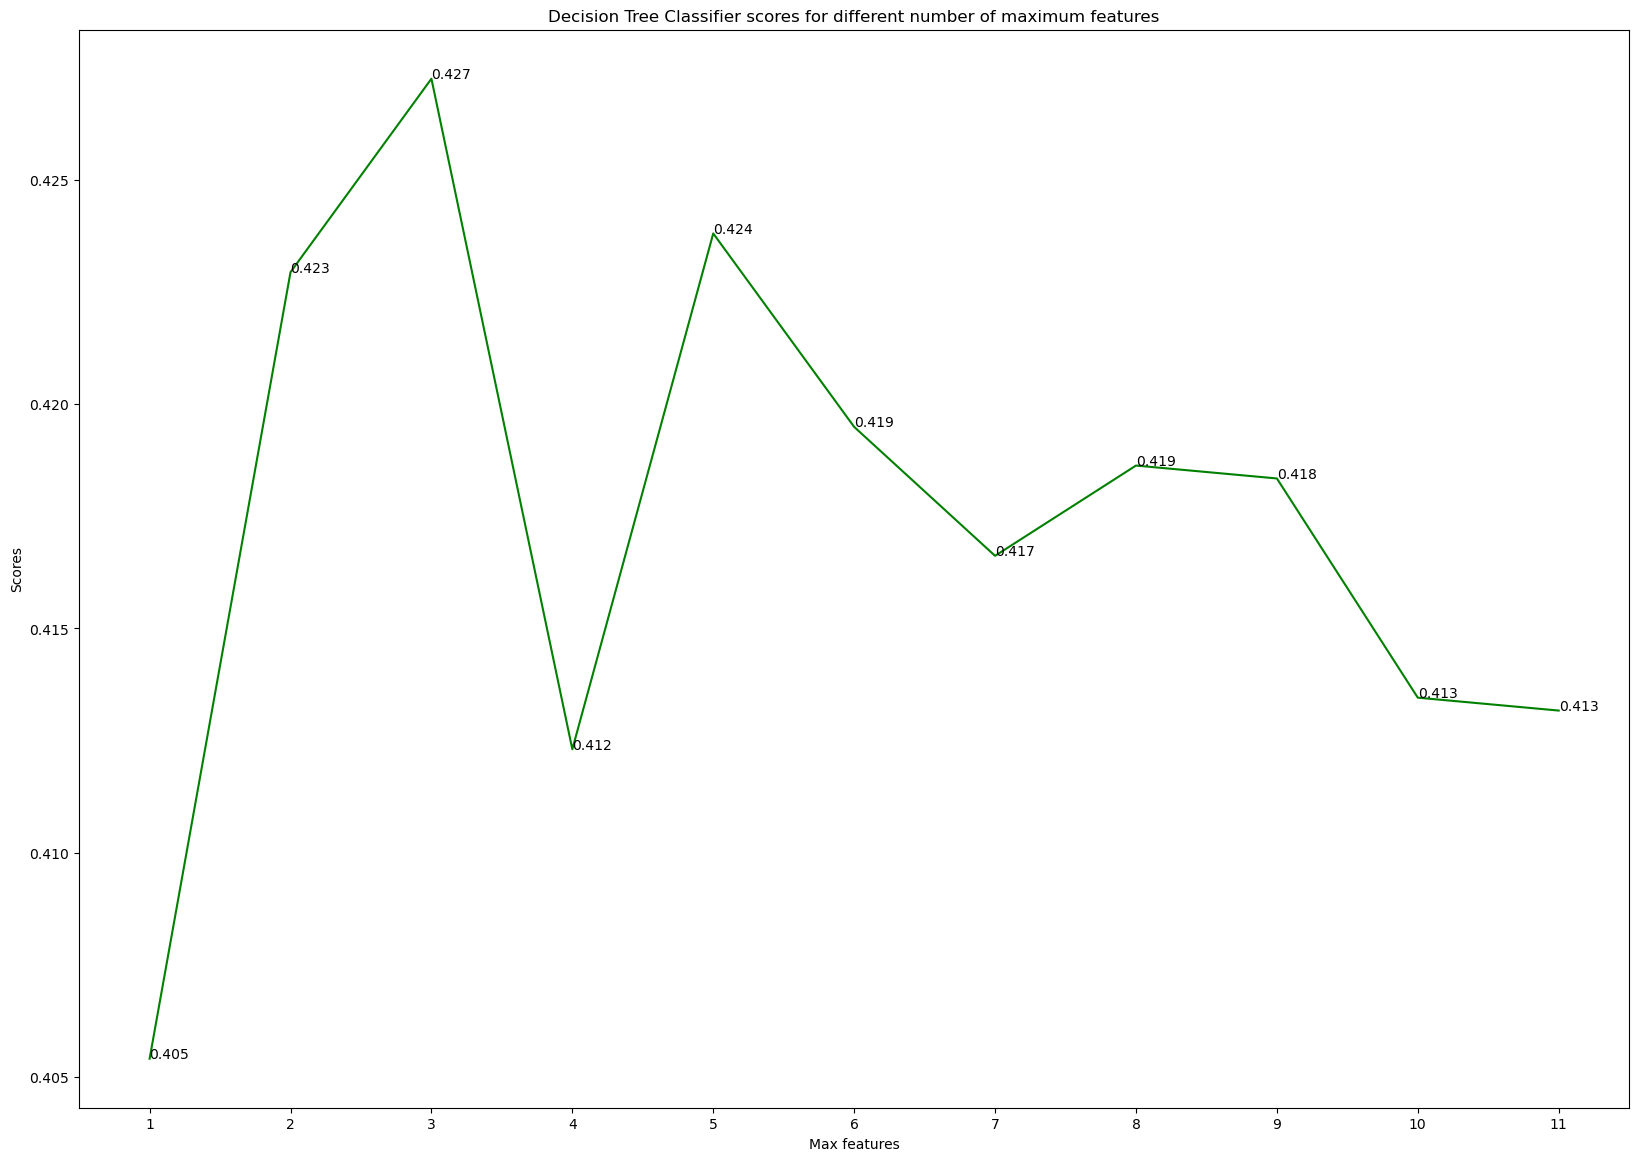

In [14]:
# Decision Tree Classifier with varying number of features (or columns)
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i - 1], "%.3f" % dt_scores[i - 1])
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

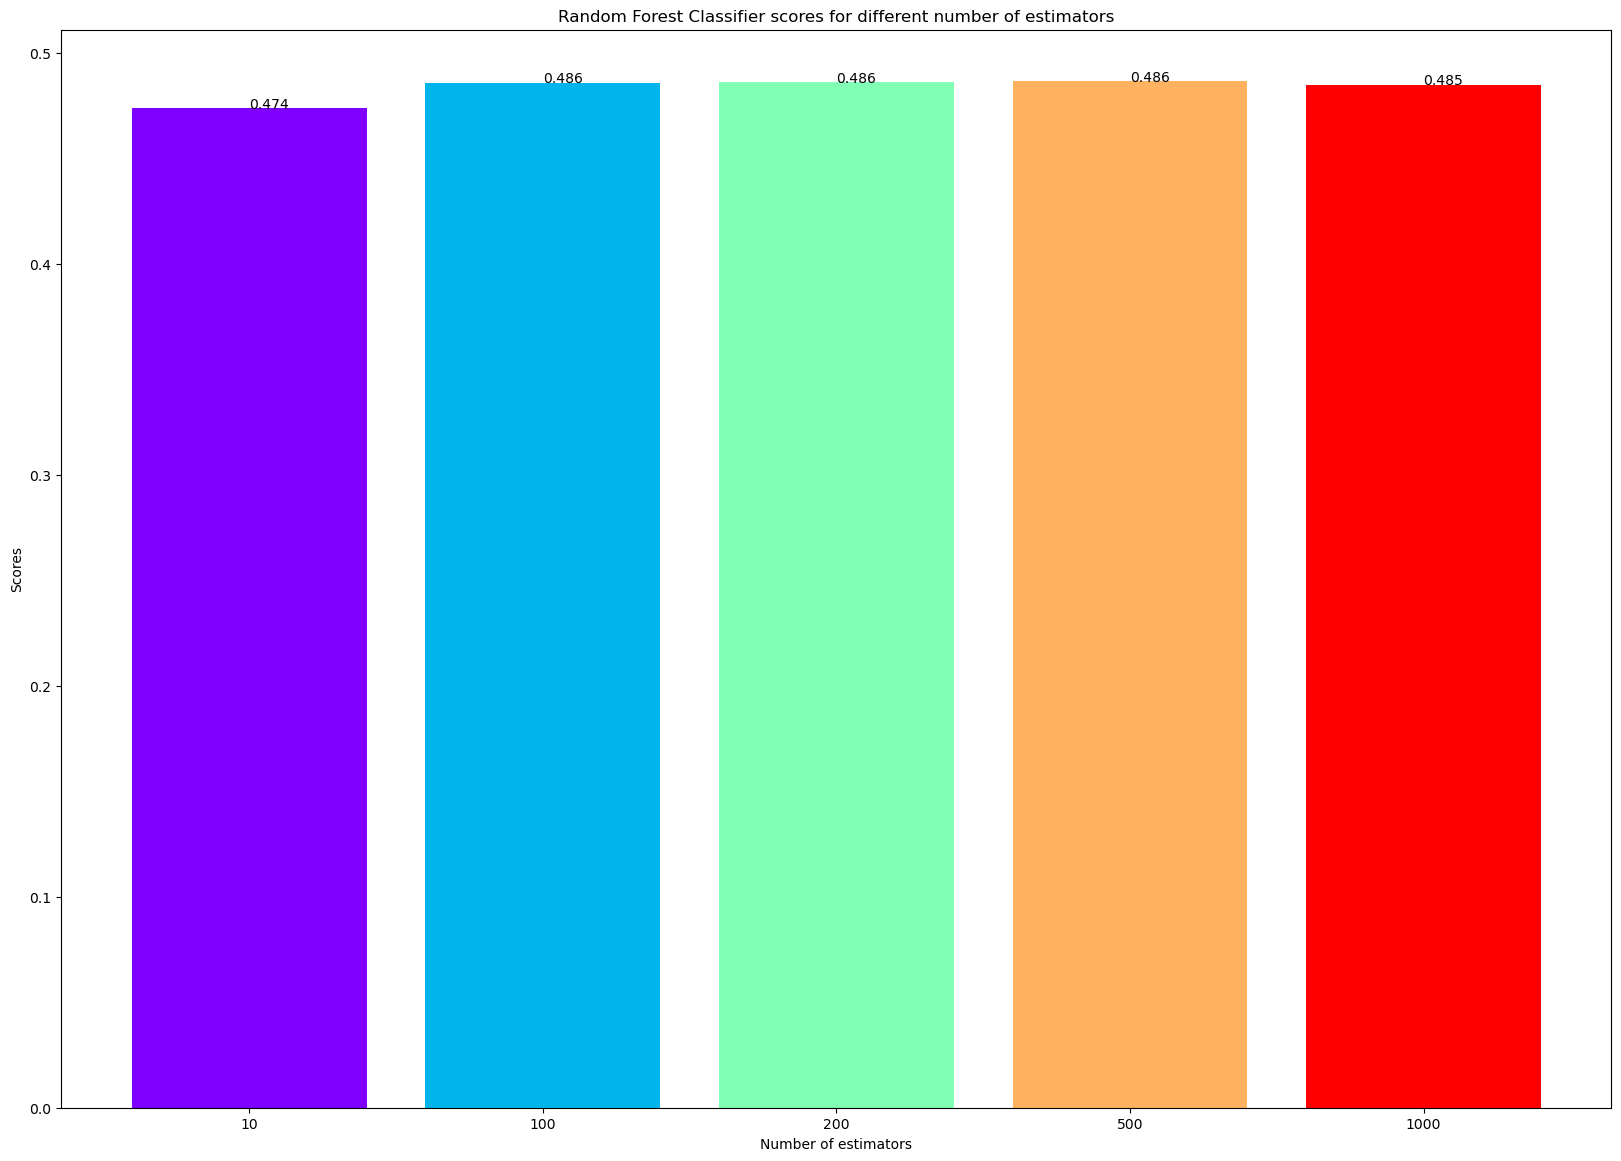

In [15]:
# Random Forest Classifier with varying number of trees (or features)
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], "%.3f" % rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

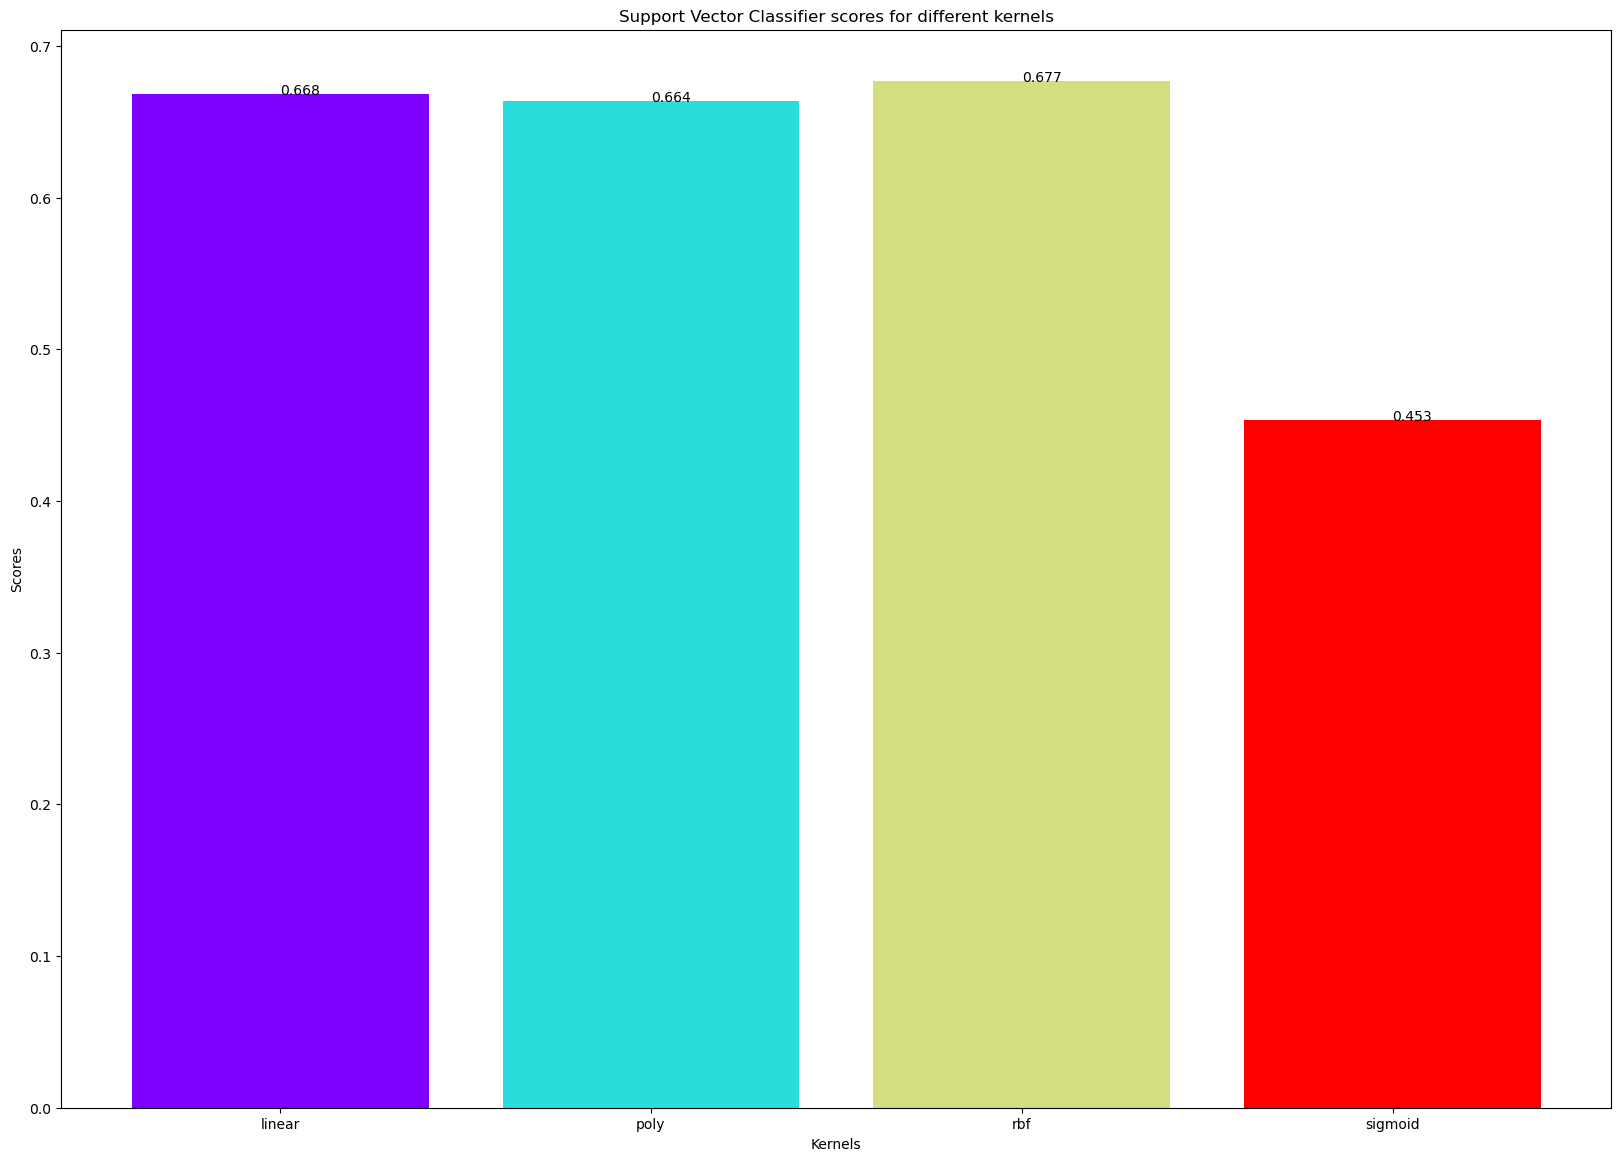

In [16]:
# Support Vector Classifier with different kernels
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], "%.3f" % svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')